# **Laptop Price Prediction for SmartTech Co.**





**Buisness Problem**

> SmartTech Co. aims to develop a machine learning model that predicts laptop prices accurately. The model will analyze key specifications—including brand, processor type, RAM, storage, and screen size—to help both consumers and manufacturers make informed pricing decisions.



**Objective**

Primary Objective:
Develop a data-driven pricing strategy by creating a robust machine learning model that accurately predicts laptop prices based on key specifications.







**🎯 Target Variable:**

Price → Price is the target variable used to predict the laptop's price based on its features.


**📥 Feature Variables:**
Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,GPU,Opsys,Weight,Price



## **Data Understanding**

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("laptop.csv",index_col=0)
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300.0,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [3]:
#Display first 5 rows
print("First 5 rows of the dataset:")
print(df.head(35))


First 5 rows of the dataset:
    Unnamed: 0 Company            TypeName Inches  \
0          0.0   Apple           Ultrabook   13.3   
1          1.0   Apple           Ultrabook   13.3   
2          2.0      HP            Notebook   15.6   
3          3.0   Apple           Ultrabook   15.4   
4          4.0   Apple           Ultrabook   13.3   
5          5.0    Acer            Notebook   15.6   
6          6.0   Apple           Ultrabook   15.4   
7          7.0   Apple           Ultrabook   13.3   
8          8.0    Asus           Ultrabook     14   
9          9.0    Acer           Ultrabook     14   
10        10.0      HP            Notebook   15.6   
11        11.0      HP            Notebook   15.6   
12        12.0   Apple           Ultrabook   15.4   
13        13.0    Dell            Notebook   15.6   
14        14.0   Apple           Ultrabook     12   
15        15.0   Apple           Ultrabook   13.3   
16        16.0    Dell            Notebook   15.6   
17        17.0   

In [4]:
#Dataset shape
print("\nDataset shape:")
print(df.shape)


Dataset shape:
(1303, 12)


In [5]:
#Handling of missing values

df.replace('?',np.nan,inplace=True)

#Remove rows that are empty
df.dropna(how='all',inplace=True)

#Remove missing values
df.dropna(inplace=True)

In [6]:
# Unique values in each column
print("\nUnique Values Per Column: ")
for col in df.columns:
    print(f"{col}:      {df[col].nunique()} unique values")



Unique Values Per Column: 
Unnamed: 0:      1270 unique values
Company:      19 unique values
TypeName:      6 unique values
Inches:      24 unique values
ScreenResolution:      40 unique values
Cpu:      118 unique values
Ram:      10 unique values
Memory:      39 unique values
Gpu:      110 unique values
OpSys:      9 unique values
Weight:      188 unique values
Price:      775 unique values


In [7]:
# Check for duplicate rows
print("\nNumber of Duplicate Rows:")
print(df.duplicated().sum())


Number of Duplicate Rows:
0


In [8]:
# drop duplicate rows
df.drop_duplicates(inplace=True)
print("Duplicate Rows: ",df.duplicated().sum())


Duplicate Rows:  0


In [9]:
#Convert columns to numeric types
df['Ram'] = df['Ram'].str.replace('GB','').astype('int32')
df['Weight'] = df['Weight'].str.replace('kg','').astype('float32')
df['Inches']=df['Inches'].astype(float)

In [10]:
df.describe()

,Unnamed: 0,Inches,Ram,Weight,Price
count,1270.000000,1270.000000,1270.00000,1270.000000,1270.000000
mean,653.071654,15.131890,8.45748,2.077677,59886.072669
std,376.683788,1.955256,5.56693,0.808377,37323.784300
min,0.000000,10.100000,1.00000,0.000200,9270.720000
25%,327.250000,14.000000,4.00000,1.500000,31914.720000
50%,652.500000,15.600000,8.00000,2.040000,52054.560000
75%,980.750000,15.600000,8.00000,2.320000,79303.816800
max,1302.000000,35.600000,64.00000,11.100000,324954.720000


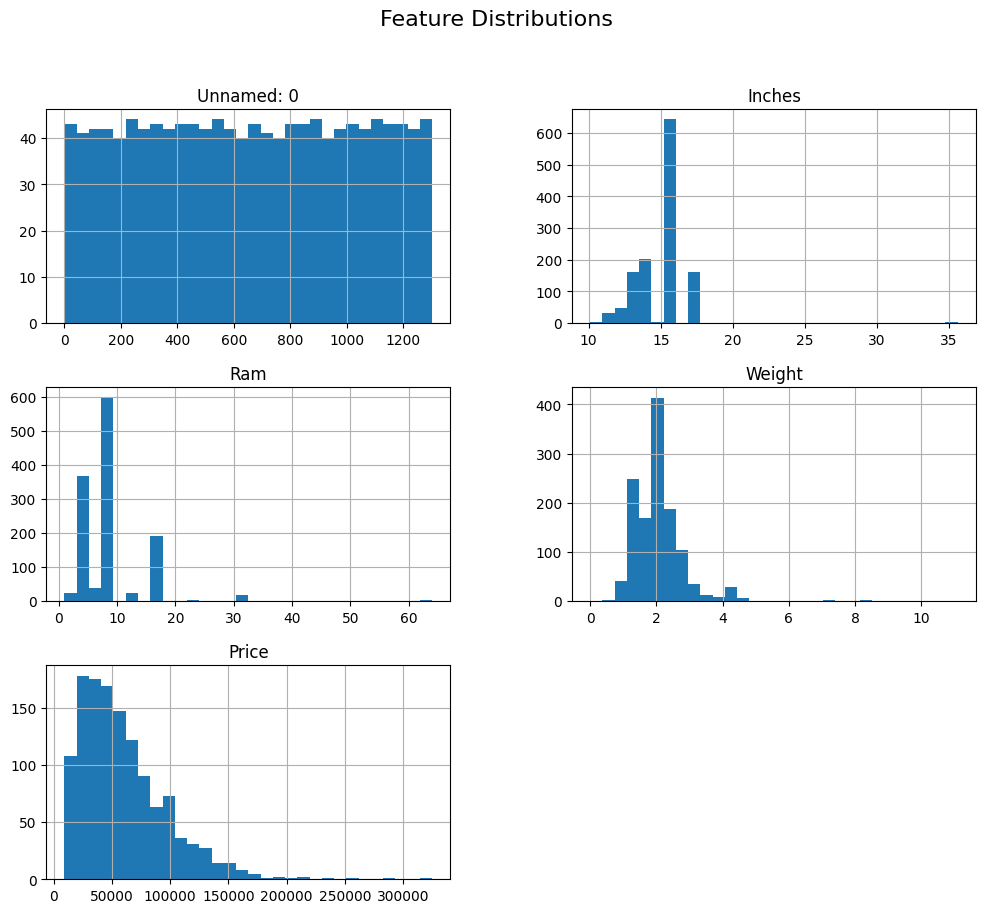

In [11]:
# Histogram for numerical columns
df.hist(figsize=(12, 10), bins=30)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

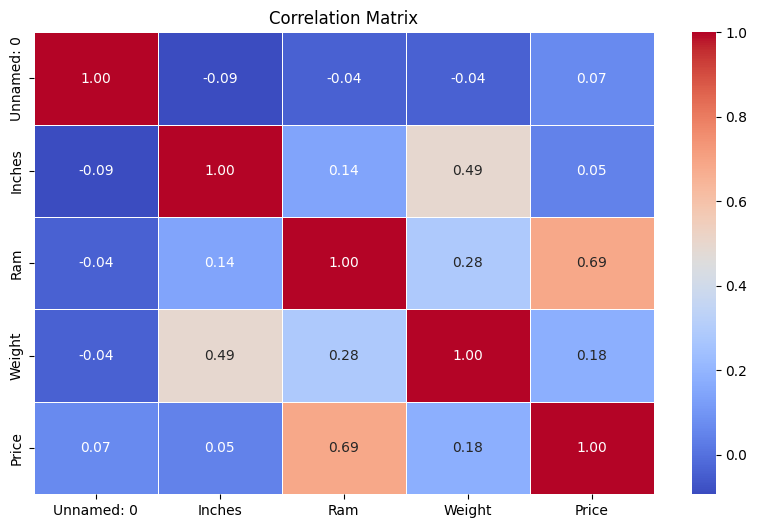

In [12]:
 #Correlation matrix (only for numerical features)
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

Checking for Outliers

<ipython-input-13-2ac731e73b33>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=col, palette="Set2")
<ipython-input-13-2ac731e73b33>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=col, palette="Set2")
<ipython-input-13-2ac731e73b33>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=col, palette="Set2")
<ipython-input-13-2ac731e73b33>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same

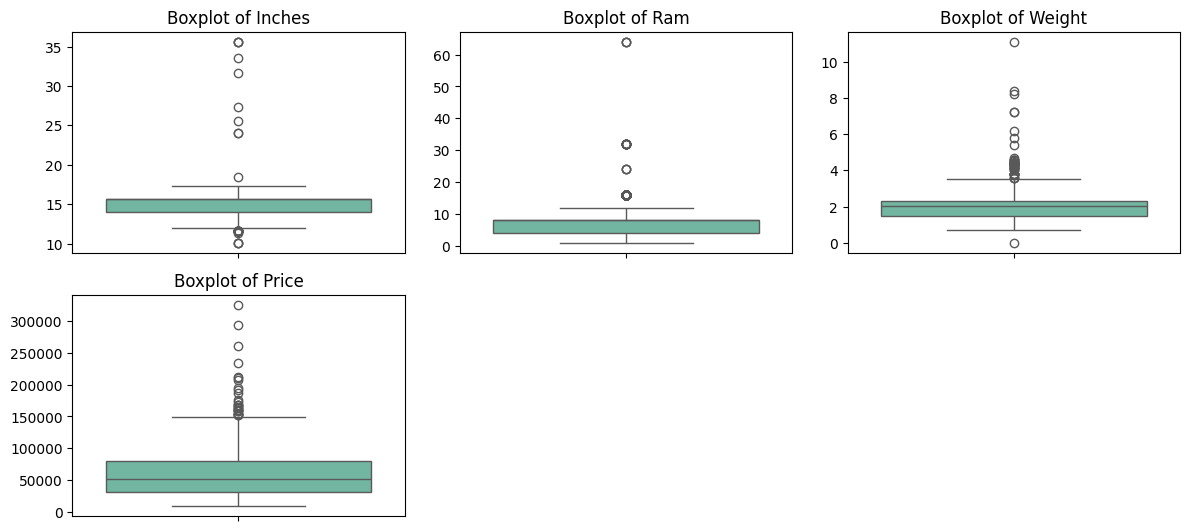

In [13]:
numerical_features = ["Inches","Ram","Weight","Price"]

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, y=col, palette="Set2")
    plt.title(f"Boxplot of {col}")
    plt.ylabel("")
plt.tight_layout()
plt.show()


In [14]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute IQR
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Detect outliers
outliers_iqr = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).sum()
print("\nOutliers detected using IQR:\n", outliers_iqr)


Outliers detected using IQR:
 Unnamed: 0      0
Inches         45
Ram           216
Weight         55
Price          28
dtype: int64


In [15]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])  # Consider only numerical columns

# Calculate Q1, Q3, and IQR
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_mask = (numeric_df < lower_bound) | (numeric_df > upper_bound)

# Filter out outliers
df_cleaned = df[~outliers_mask.any(axis=1)]

print("Original Data Shape:", df.shape)
print("After IQR Outlier Removal:", df_cleaned.shape)



Original Data Shape: (1270, 12)
After IQR Outlier Removal: (996, 12)


## Feature engineering

In [16]:
import pandas as pd
import numpy as np


# Define the function to extract CPU series
def extract_series(cpu):
    if pd.isna(cpu):
        return 'Unknown'
    if 'Intel Core i3' in cpu:
        return 'Intel Core i3'
    elif 'Intel Core i5' in cpu:
        return 'Intel Core i5'
    elif 'Intel Core i7' in cpu:
        return 'Intel Core i7'
    elif 'Intel Core M' in cpu:
        return 'Intel Core M'
    elif 'Intel Atom' in cpu:
        return 'Intel Atom'
    elif 'Intel Pentium' in cpu:
        return 'Intel Pentium'
    elif 'Intel Celeron' in cpu:
        return 'Intel Celeron'
    elif 'Intel Xeon' in cpu:
        return 'Intel Xeon'
    elif 'AMD E-Series' in cpu:
        return 'AMD E-Series'
    elif 'AMD A6-Series' in cpu:
        return 'AMD A6-Series'
    elif 'AMD A9-Series' in cpu:
        return 'AMD A9-Series'
    elif 'AMD A10-Series' in cpu:
        return 'AMD A10-Series'
    elif 'AMD A12-Series' in cpu:
        return 'AMD A12-Series'
    elif 'AMD FX' in cpu:
        return 'AMD FX'
    elif 'AMD Ryzen' in cpu:
        return 'AMD Ryzen'
    else:
        return 'Other'

# Apply the function to the 'Cpu' column and create a new column 'Cpu_Series'
df['Cpu_Series'] = df['Cpu'].apply(extract_series)

In [17]:
def categorize_gpu(gpu_name):
    if 'Intel' in gpu_name:
        return 'Intel'
    elif 'AMD' in gpu_name:
        return 'AMD'
    elif 'Nvidia' in gpu_name or 'NVIDIA' in gpu_name:
        return 'Nvidia'
    elif 'ARM Mali' in gpu_name:
        return 'ARM Mali'
    else:
        return 'other'

# Apply the function to the 'Gpu' column and create a new column 'GpuCategory'
df['GpuCategory'] = df['Gpu'].apply(categorize_gpu)

# Verify the result
print(df[['Gpu', 'GpuCategory']].head())
print(df['GpuCategory'].value_counts())

                            Gpu GpuCategory
0  Intel Iris Plus Graphics 640       Intel
1        Intel HD Graphics 6000       Intel
2         Intel HD Graphics 620       Intel
3            AMD Radeon Pro 455         AMD
4  Intel Iris Plus Graphics 650       Intel
GpuCategory
Intel       702
Nvidia      392
AMD         175
ARM Mali      1
Name: count, dtype: int64


In [18]:
import re

# Function to extract SSD and HDD storage from memory string
def extract_storage(memory):
    ssd = 0
    hdd = 0
    flash_storage = 0
    hybrid = 0
    ssd_match = re.findall(r'(\d+(?:\.\d+)?)(?=GB SSD|TB SSD)', memory)
    hdd_match = re.findall(r'(\d+(?:\.\d+)?)(?=GB HDD|TB HDD)', memory)
    flash_storage_match = re.findall(r'(\d+(?:\.\d+)?)(?=GB Flash Storage|TB Flash Storage)', memory)
    hybrid_match = re.findall(r'(\d+(?:\.\d+)?)(?=GB Hybrid|TB Hybrid)', memory)

    if ssd_match:
        ssd = sum(int(float(x.replace('TB', '1024').replace('GB', ''))) for x in ssd_match)

    if hdd_match:
        hdd = sum(int(float(x.replace('TB', '1024').replace('GB', ''))) for x in hdd_match)

    if flash_storage_match:
        flash_storage = sum(int(float(x.replace('TB', '1024').replace('GB', ''))) for x in flash_storage_match)

    if hybrid_match:
        hybrid = sum(int(float(x.replace('TB', '1024').replace('GB', ''))) for x in hybrid_match)

    return pd.Series([ssd, hdd,flash_storage,hybrid])

# Apply the function to the DataFrame and create new columns
df[['SSD', 'HDD','Flash Storage','Hybrid']] = df['Memory'].apply(extract_storage)

# Print the result
print(df[['Memory', 'SSD', 'HDD','Flash Storage','Hybrid']].value_counts())







Memory                         SSD   HDD  Flash Storage  Hybrid
256GB SSD                      256   0    0              0         399
1TB HDD                        0     1    0              0         217
500GB HDD                      0     500  0              0         130
512GB SSD                      512   0    0              0         116
128GB SSD +  1TB HDD           128   1    0              0          92
128GB SSD                      128   0    0              0          74
256GB SSD +  1TB HDD           256   1    0              0          71
32GB Flash Storage             0     0    32             0          37
2TB HDD                        0     2    0              0          16
64GB Flash Storage             0     0    64             0          14
512GB SSD +  1TB HDD           512   1    0              0          14
1TB SSD                        1     0    0              0          13
256GB SSD +  2TB HDD           256   2    0              0          10
1.0TB Hybrid 

In [19]:
def categorize_os(os_name):
    if 'Windows 10' in os_name or 'Windows 7' in os_name or 'Windows 10 S' in os_name:
        return 'Windows'
    elif 'No OS' in os_name:
        return 'No OS'
    elif 'Mac OS X' in os_name or 'macOS' in os_name:
        return 'macOS'
    elif 'Linux' in os_name or 'Chrome OS' in os_name or 'Android' in os_name:
        return 'other/Linux'
    else:
        return 'Unknown'

# Assuming 'df' is your DataFrame and 'OS' is the column containing the OS names
df['OS'] = df['OpSys'].apply(categorize_os)

# Verify the result
print(df[['OpSys', 'OS']].head())
print(df['OS'].value_counts())



   OpSys     OS
0  macOS  macOS
1  macOS  macOS
2  No OS  No OS
3  macOS  macOS
4  macOS  macOS
OS
Windows        1097
other/Linux      89
No OS            63
macOS            21
Name: count, dtype: int64


In [20]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 'Touchscreen' if 'Touchscreen' in x else 'NonTouchscreen')
df['Touchscreen'].value_counts()

,count
Touchscreen,
NonTouchscreen,1085
Touchscreen,185


In [21]:
# Function to extract X and Y resolutions and panel type using regular expressions
def extract_resolution(resolution):
    match = re.match(r'(?:(?P<panel_type>.*?)(?:\sPanel)?\s?(?:\/)?\s?(?:Touchscreen)?\s?)(?P<x_res>\d+)x(?P<y_res>\d+)', resolution)
    if match:
        panel_type = match.group('panel_type') or 'Unknown'
        if panel_type == "IPS":
            panel_type = "IPS Panel"
        x_res = int(match.group('x_res'))
        y_res = int(match.group('y_res'))
        return pd.Series([panel_type, x_res, y_res])
    else:
        return pd.Series(['Unknown', 0, 0])

# Apply the function to the 'ScreenResolution' column and create new columns 'PanelType', 'X_res', and 'Y_res'
df[['PanelType', 'X_res', 'Y_res']] = df['ScreenResolution'].apply(extract_resolution)

# Function to modify the PanelType column
def modify_panel_type(panel_type):
    panel_type = re.sub(r'(?i)(?:\/|\\|Touchscreen)', '', panel_type)  # Remove "/", "\", and "Touchscreen"
    if panel_type.startswith("IPS Panel"):
        panel_type = "IPS Panel"
    panel_type = re.sub(r'^\s+|\s+$', '', panel_type)  # Strip leading and trailing whitespaces
    return panel_type

# Apply the modification to the PanelType column
df['PanelType'] = df['PanelType'].apply(modify_panel_type)

# Print the result
print(df[['ScreenResolution', 'PanelType', 'X_res', 'Y_res']])

                                ScreenResolution  PanelType  X_res  Y_res
0             IPS Panel Retina Display 2560x1600  IPS Panel   2560   1600
1                                       1440x900    Unknown   1440    900
2                              Full HD 1920x1080    Full HD   1920   1080
3             IPS Panel Retina Display 2880x1800  IPS Panel   2880   1800
4             IPS Panel Retina Display 2560x1600  IPS Panel   2560   1600
...                                          ...        ...    ...    ...
1298   IPS Panel Full HD / Touchscreen 1920x1080  IPS Panel   1920   1080
1299  IPS Panel Quad HD+ / Touchscreen 3200x1800  IPS Panel   3200   1800
1300                                    1366x768    Unknown   1366    768
1301                                    1366x768    Unknown   1366    768
1302                                    1366x768    Unknown   1366    768

[1270 rows x 4 columns]


### Label Encoding

In [22]:
from sklearn.preprocessing import LabelEncoder


columns_to_encode = ['Company','TypeName','OS','Touchscreen','Cpu_Series','GpuCategory','PanelType']

# Dictionary to store label encoders
label_encoders = {}

# Label encode each column in the list
for col in columns_to_encode:
 le = LabelEncoder()
 df[col] = le.fit_transform(df[col])
 label_encoders[col] = le

In [23]:
# To print the mapping for each column
for col, le in label_encoders.items():
    print(f"Mapping for {col}:")
    for class_index, class_label in enumerate(le.classes_):
        print(f"  {class_label}: {class_index}")

Mapping for Company:
  Acer: 0
  Apple: 1
  Asus: 2
  Chuwi: 3
  Dell: 4
  Fujitsu: 5
  Google: 6
  HP: 7
  Huawei: 8
  LG: 9
  Lenovo: 10
  MSI: 11
  Mediacom: 12
  Microsoft: 13
  Razer: 14
  Samsung: 15
  Toshiba: 16
  Vero: 17
  Xiaomi: 18
Mapping for TypeName:
  2 in 1 Convertible: 0
  Gaming: 1
  Netbook: 2
  Notebook: 3
  Ultrabook: 4
  Workstation: 5
Mapping for OS:
  No OS: 0
  Windows: 1
  macOS: 2
  other/Linux: 3
Mapping for Touchscreen:
  NonTouchscreen: 0
  Touchscreen: 1
Mapping for Cpu_Series:
  AMD A10-Series: 0
  AMD A12-Series: 1
  AMD A6-Series: 2
  AMD A9-Series: 3
  AMD E-Series: 4
  AMD FX: 5
  AMD Ryzen: 6
  Intel Atom: 7
  Intel Celeron: 8
  Intel Core M: 9
  Intel Core i3: 10
  Intel Core i5: 11
  Intel Core i7: 12
  Intel Pentium: 13
  Intel Xeon: 14
  Other: 15
Mapping for GpuCategory:
  AMD: 0
  ARM Mali: 1
  Intel: 2
  Nvidia: 3
Mapping for PanelType:
  4K Ultra HD: 0
  Full HD: 1
  IPS Panel: 2
  Quad HD+: 3
  Unknown: 4


In [24]:
# Convert 'Weight' column to string type
df['Weight'] = df['Weight'].astype(str)
df['Ram'] = df['Ram'].astype(str)

# Extract only numeric values from 'Weight' column
df['Weight'] = df['Weight'].str.extract(r'([\d.]+)').astype(float)
df['Ram'] = df['Ram'].str.extract(r'(\d+)').astype(float)
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,...,GpuCategory,SSD,HDD,Flash Storage,Hybrid,OS,Touchscreen,PanelType,X_res,Y_res
0,0.0,1,4,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,...,2,128,0,0,0,2,0,2,2560,1600
1,1.0,1,4,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,...,2,0,0,128,0,2,0,4,1440,900
2,2.0,7,3,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,...,2,256,0,0,0,0,0,1,1920,1080
3,3.0,1,4,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,...,0,512,0,0,0,2,0,2,2880,1800
4,4.0,1,4,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,...,2,256,0,0,0,2,0,2,2560,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298.0,10,0,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4.0,128GB SSD,Intel HD Graphics 520,Windows 10,...,2,128,0,0,0,1,1,2,1920,1080
1299,1299.0,10,0,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16.0,512GB SSD,Intel HD Graphics 520,Windows 10,...,2,512,0,0,0,1,1,2,3200,1800
1300,1300.0,10,3,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2.0,64GB Flash Storage,Intel HD Graphics,Windows 10,...,2,0,0,64,0,1,0,4,1366,768
1301,1301.0,7,3,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6.0,1TB HDD,AMD Radeon R5 M330,Windows 10,...,0,0,1,0,0,1,0,4,1366,768


In [25]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price', 'Cpu_Series',
       'GpuCategory', 'SSD', 'HDD', 'Flash Storage', 'Hybrid', 'OS',
       'Touchscreen', 'PanelType', 'X_res', 'Y_res'],
      dtype='object')

# Selecting features and target variable

In [26]:
x=df[['Company','TypeName','Ram','Inches','OS','Cpu_Series','Touchscreen','GpuCategory','SSD','HDD','Flash Storage','Hybrid','PanelType','X_res','Y_res']]
x

,Company,TypeName,Ram,Inches,OS,Cpu_Series,Touchscreen,GpuCategory,SSD,HDD,Flash Storage,Hybrid,PanelType,X_res,Y_res
0,1,4,8.0,13.3,2,11,0,2,128,0,0,0,2,2560,1600
1,1,4,8.0,13.3,2,11,0,2,0,0,128,0,4,1440,900
2,7,3,8.0,15.6,0,11,0,2,256,0,0,0,1,1920,1080
3,1,4,16.0,15.4,2,12,0,0,512,0,0,0,2,2880,1800
4,1,4,8.0,13.3,2,11,0,2,256,0,0,0,2,2560,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,10,0,4.0,14.0,1,12,1,2,128,0,0,0,2,1920,1080
1299,10,0,16.0,13.3,1,12,1,2,512,0,0,0,2,3200,1800
1300,10,3,2.0,14.0,1,8,0,2,0,0,64,0,4,1366,768
1301,7,3,6.0,15.6,1,12,0,0,0,1,0,0,4,1366,768


In [27]:
y = df[['Price']]
y

,Price
0,71378.6832
1,47895.5232
2,30636.0000
3,135195.3360
4,96095.8080
...,...
1298,33992.6400
1299,79866.7200
1300,12201.1200
1301,40705.9200


# Splitting the data into training and testing sets

In [28]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= 0.2, random_state = 42)
print("train", x_train.shape)
print("test", x_test.shape)


train (1016, 15)
test (254, 15)


In [29]:
from sklearn.preprocessing import StandardScaler

# Feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [30]:
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [31]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regression': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor' : GradientBoostingRegressor(random_state=42),
    'XGBoost Regressor': xgb.XGBRegressor(random_state=42)
}

In [32]:
results = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = {'R_2 Score': r2, 'Mean Squared Error': mse , 'Predictions': y_pred}

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


In [33]:
# Printing results
for name, metrics in results.items():
    print(f"\nModel: {name}")
    print(f"R-squared: {metrics['R_2 Score']}")
    print(f"Mean Squared Error: {metrics['Mean Squared Error']}\n")


Model: Linear Regression
R-squared: 0.6039912817054862
Mean Squared Error: 440325039.99111944


Model: Random Forest Regression
R-squared: 0.8338655456499053
Mean Squared Error: 184726135.7544251


Model: Gradient Boosting Regressor
R-squared: 0.8126058891921002
Mean Squared Error: 208364905.9317487


Model: XGBoost Regressor
R-squared: 0.7834740281105042
Mean Squared Error: 240756832.0



## Hyperparameter Tuning

In [34]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import xgboost as xgb
import pickle
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regression': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42),
    'XGBoost Regressor': xgb.XGBRegressor(random_state=42)
}

# Define parameter distributions for each model
param_dists = {
    'Linear Regression': {
        'fit_intercept': [True, False],
        'copy_X': [True, False],
        'positive': [True, False]
    },
    'Random Forest Regression': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt']
    },
    'Gradient Boosting Regressor': {
        'n_estimators': [100, 200, 300, 400, 500],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'max_depth': [3, 4, 5, 6],
        'subsample': [0.7, 0.8, 0.9, 1.0],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'XGBoost Regressor': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.05],
        'max_depth': [3, 4, 5],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0]
    }
}

# Perform RandomizedSearchCV for each model
best_models = {}
for name, model in models.items():
    print(f"Tuning {name}...")
    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dists[name], cv=5, n_iter=10, scoring='r2', n_jobs=-1, random_state=42)
    random_search.fit(x_train, y_train)
    best_models[name] = random_search.best_estimator_
    print(f"Best parameters for {name}: {random_search.best_params_}")
    print(f"Best R-squared for {name}: {random_search.best_score_}")

# Evaluate the best models on the test set
results = {}
best_model_name = None
best_r2_score = -float('inf')

for name, model in best_models.items():
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = {'R_2 Score': r2, 'Mean Squared Error': mse, 'Predictions': y_pred}

    if r2 > best_r2_score:
        best_r2_score = r2
        best_model_name = name

# Save the best model
best_model = best_models[best_model_name]
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)


# Print the results
for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"R-squared: {metrics['R_2 Score']}")
    print(f"Mean Squared Error: {metrics['Mean Squared Error']}\n")

print(f"Best model: {best_model_name} with R-squared: {best_r2_score}")


Tuning Linear Regression...


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for Linear Regression: {'positive': True, 'fit_intercept': False, 'copy_X': True}
Best R-squared for Linear Regression: 0.3612436852658483
Tuning Random Forest Regression...


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
23 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

Best parameters for Random Forest Regression: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
Best R-squared for Random Forest Regression: 0.7561925973532084
Tuning Gradient Boosting Regressor...


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Best parameters for Gradient Boosting Regressor: {'subsample': 0.9, 'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 5, 'learning_rate': 0.05}
Best R-squared for Gradient Boosting Regressor: 0.7729398486349339
Tuning XGBoost Regressor...
Best parameters for XGBoost Regressor: {'subsample': 0.9, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 1.0}
Best R-squared for XGBoost Regressor: 0.7714925289154053
Model: Linear Regression
R-squared: 0.575990210280537
Mean Squared Error: 471459639.6233815

Model: Random Forest Regression
R-squared: 0.8509345793150533
Mean Squared Error: 165746950.23652834

Model: Gradient Boosting Regressor
R-squared: 0.8533296309538768
Mean Squared Error: 163083874.50125778

Model: XGBoost Regressor
R-squared: 0.7927759885787964
Mean Squared Error: 230413936.0

Best model: Gradient Boosting Regressor with R-squared: 0.8533296309538768
